**Pokemon** is a global icon to children and adults everywhere. It is a TV series that has expanded into video games, card games, movies, merchandise and everything inbetween. The motivation behind this analysis is to further understand the dynamics of the pokemon universe through data. Part of this notebook is being built off the process used in  [Rachel Tatman's kernal]( https://www.kaggle.com/rtatman/which-pokemon-win-the-most/notebook). She has done some fanstatic work and does an excellent job explaing her thought process. I am interested in improving my python skills, so I will replicate her work from R to python and develop further analysis. I will be looking at missing values and getting some simple calcualtions in. I will then visualize some results using Matplotlib and Seaborn. I will conclude the venture with some machine learning and PCA to try and predict the win percentage of the pokemon. 
​
The structure is as follows: 
## Table of Contents
> 1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * 1.1. [Missing-Values](#Missing-Values)
    * 1.2 [Visualizing the Data](#Visualizing-the-Data)
        * 1.2.1 [Seaborn Pairplot](#Seaborn-Pairplot)
        * 1.2.2 [Correlation Table](#Correlation-Table)
    * 1.3 [Exploratory Data Analysis Conclusion](#Exploratory-Data-Analysis-Conclusion)
> 2. [Machine Learning](#Machine-Learning)
    * 2.1 [Select Data](#Select-Data)
    * 2.2 [Preprocessing Data](#Preprocessing-Data)
    * 2.3 [Feature Scaling](#Feature-Scaling)  
    * 2.4 [Regression Models](#Regression-Models)  
        * 2.4.1 [Multiple Linear Regression](#Multiple-Linear-Regression)
        * 2.4.2 [Polynomial Regression](#Polynomial-Regression)
        * 2.4.3 [SVM](#SVM)
        * 2.4.4 [Regression Tree](#Regression-Tree)
        * 2.4.5 [Rangom Forest](#Random-Forest)
        * 2.4.6 [XGBoost](#XGBoost)
    * 2.5 [Principle Component Analysis](#Principle-Component-Analysis)
    * 2.6 [Validation](#Validation)
> 3. [Conclusion](#Conclusion)
​
Data analysis is a powerful tool. However, simply creating visualizations and preditions is not enough to drive decisions in the business world. I will do my best to explain each figure and calculation and how it could be useful to a business in the Pokemon Universe. This is what I am thinking. Let's say there is a company called "**Team Rocket**" who makes millions of dollars off of pokemon battles (I do not condone animal violence in any way, shape or form and no Pokemon were injured during this analysis). As a data consultant, **Team Rocket** gives you this data set and ask you to come up with some useful insight on how to improve their business. This can be difficult because there in not much direction given for the analysis. 
​
Let's break down the task. 
>  1. Understand the business: Team Rocket funds their illegal activities through winning pokemon battles and tournaments. Thus, we will want our analysis to be directed towards finding the best pokemon. 
>  2. Start shallow and dive deeper: As we explore the data, I think its best practice to start the investigation at a higher lever then work our way down and traverse the data. 
>  3. Drive Business Decisions: Once out analysis is complete, relate it back to the business and make suggestions for areas Team Rocket could improve in.

# Exploratory Data Analysis

We begin by importing the proper libraries, files and taking a look at what we're dealing with, 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt # data visualization
#import matplotlib.pyplot as plt
import seaborn as sns #data visualization
import random 

random.seed(1)
# Import the dataset
pokemon = pd.read_csv("pokemon.csv")
# rename the column with a pound sign/hashtag as "number" its name
# The reason for this is when  we try and access this column later it will comment out the code
pokemon = pokemon.rename(index=str, columns={"#": "Number"})
combat = pd.read_csv("combats.csv")
pokemon.head()

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [ ]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [ ]:
print("Dimenstions of Pokemon: " + str(pokemon.shape))
print("Dimenstions of Combat: " + str(combat.shape))

Dimenstions of Pokemon: (800, 12)
Dimenstions of Combat: (50000, 3)


## Missing Values

In [ ]:
pokemon.isnull().sum()

Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
combat.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

Some quick notes and comments about the data:

>    1. Type 2 there is are NA values. Some Pokemon have secondary classification. For example, one pokemon might be able to breath fire and fly. So its Type 1 would be 'fire' but it would also can fly so its Type 2 would be 'flying'.  Some pokemon don't have a secondary type, thus the NA value. There are 386 pokemon without a Type 2. 
>    2. There is one name that is missing. We will want to explore that instance, maybe we can fix it.
>    3. There are 800 different pokemon in the dataset and 50k battles recorded


In [ ]:
print("This pokemon is before the missing Pokemon: " + pokemon['Name'][61])
print(pokemon[pokemon['Name'].isnull()])
print("This pokemon is after the missing Pokemon: " + pokemon['Name'][63])

This pokemon is before the missing Pokemon: Mankey
    Number Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
62      63  NaN  Fighting    NaN  65     105       60       60       70   

    Speed  Generation  Legendary  
62     95           1      False  
This pokemon is after the missing Pokemon: Growlithe


Assuming that the indexes follow the same numbering system as the National Pokedex Number, we can look up the missing Pokemon that falls between the two by looking him up. I used this [link](https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_National_Pok%C3%A9dex_number). **Primeape** is the missing Pokemon. Update his name in the database.

In [ ]:
pokemon['Name'][62] = "Primeape"

<ipython-input-7-af5ca98832cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon['Name'][62] = "Primeape"


In [ ]:
pokemon['Name'][62] = "Primeape"

<ipython-input-8-af5ca98832cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon['Name'][62] = "Primeape"


From the combats dataset we will calculate the win percentage of each pokemon. Hopefully, this can help us lean more about which pokemon win. Then we can dive deeper to try and determine which stats contribute most to winning or which type of pokemon win the most. We can continually increase the granularity of our analysis to derive better understanding. We then look at the shape of the data frames and find a very interesting anomaly.

In [ ]:
# calculate the win % of each pokemon 
# add the calculation to the pokemon dataset 
total_Wins = combat.Winner.value_counts()
# get the number of wins for each pokemon
numberOfWins = combat.groupby('Winner').count()

In [ ]:
#both methods produce the same results
countByFirst = combat.groupby('Second_pokemon').count()
countBySecond = combat.groupby('First_pokemon').count()
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


We can see that the number of dimensions is different in the total wins. This can only mean there is one pokemon that was unable to win during it's fights. Lets find the pokemon that did not win a single fight.

In [ ]:
find_losing_pokemon= np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1 #offset because the index and number are off by one
losing_pokemon = pokemon.iloc[find_losing_pokemon[0],]
print(losing_pokemon)

Number            231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


Poor **Shuckle**  : It appears that he has very strong defense but is very weak in all other catergories. I suppose the saying "the best offense is a good defense" doesnt apply in the Pokemon universe. 

Add Shuckle to the data so that the array lengths are the same. This will make merging the two datasets easier. In addition, Schuckle was a pokemon that lost all of his battles. Could there be pokemon that didnt battle at all? What I do now is caculate the win percentage of each pokemon and add that feature to the data frame. I think this might be useful down the road. Lets say a new pokemon is discovered, based on its stats can we predict how much it will win?

The process of creating the "Win Percentage" column is known as **feature engineering**. It is the process of using given data and combining it in come combination to create new variable (or features) to be used in the analysis and is an important part of machine learning. Below, we develope the new feature, add it to our data set then we merge the two datasets. From there, we notice that there are some pokemon that dont have any recoreded battles. 


In [ ]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

# merge the winning dataset and the original pokemon dataset
results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='Number')
results3 = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how='left')

# We can look at the difference between the two datasets to see which pokemon never recorded a fight
#missing_Pokemon = np.setdiff1d(pokemon.index.values, results3.index.values)
#subset the dataframe where pokemon win percent is NaN
results3[results3['Win Percentage'].isnull()]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,NaN,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN,NaN


## Find the top 10 Pokemon with the worse win percentage

In [ ]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,3.0,3.0,138.0,0.021739
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,3.0,3.0,122.0,0.024590
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,4.0,4.0,129.0,0.031008
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,4.0,4.0,123.0,0.032520
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,5.0,5.0,128.0,0.039062
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,5.0,5.0,115.0,0.043478
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,6.0,6.0,130.0,0.046154
209,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,6.0,6.0,125.0,0.048000
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,7.0,7.0,133.0,0.052632
752,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,6,False,8.0,8.0,133.0,0.060150


## Find the top 10 Pokemon with the best win percentage

In [ ]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False ).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,127.0,127.0,129.0,0.984496
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,116.0,116.0,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,121.0,121.0,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,115.0,115.0,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,136.0,136.0,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,124.0,124.0,129.0,0.961240
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,122.0,122.0,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,118.0,118.0,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,119.0,119.0,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,114.0,114.0,120.0,0.950000


There is a clear difference between Poekmon that win and lose. The most obvious reason to me are the vast differences in their stats. From a quick glance it appears that attack and speed are significantly higher in Pokemon that win. I also would like to point out two other oberservations. There are several winning pokemon with the Prefix "**Mega**". I am not sure the difference between **Mega Aerodactyl** and regular  **Aerodactyl** but I'm confident that plays a role.

## Basic statistics of the data 

In [ ]:
results3.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,63.856960,63.856960,127.541507,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,32.925941,32.925941,11.397402,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,3.000000,3.000000,92.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,36.000000,36.000000,120.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,62.000000,62.000000,128.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,91.000000,91.000000,135.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,152.000000,152.000000,164.000000,0.984496


## Visualizing the Data
​
As I stated in the begining, I think data analyst often get too excited (not that there is anything wrong with that) about the project and they begin their exploration with too much detail. I belive we shoud, start very basic and take one step at a time. 

Text(0.5, 1.0, 'Total Pokemon by Type 1')

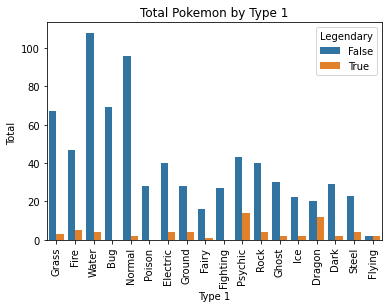

In [ ]:
import matplotlib.pyplot as plt
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=results3)
#f.set_xticklabels(rotation=30)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

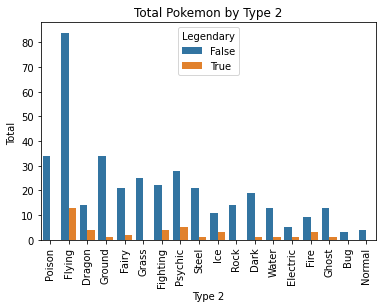

In [ ]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=results3)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

We can see that water, normal, bug and grass are the most common type 1 and flying, ground and poison are the most common type 2. Even though it doesnt tell me the exact population (ie. there are 1 million grass type 1 pokemon in the world), what it doesnt tell me is which attributes are most apparent. How this can be usefull is possibly predicting the liklihood of battling a particular type of pokemon and having a counter type to it. For example, a water type pokemon. Since we know water pokemon are weak agaisnt grass or electric, it might be a good idea to keep one of those types in our battle squad. 

Lets aggregate our win percentage by type 1.

In [ ]:
results3.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

,Win Percentage
Type 1,
Fairy,0.329300
Rock,0.404852
Steel,0.424529
Poison,0.433262
Bug,0.439006
Ice,0.439604
Grass,0.440364
Water,0.469357
Fighting,0.475616


Flying, dragon and electric type pokemon have a significant win percentage over the other types. My hypothesis is that there are many pokemons whos attacks are ineffective while the other pokemon is flying, thus giving the other pokemon a significant advantage. 

**We can further break down the data by looking at type by generation, legendary by generation, stats by type, stats by generation, stats by lengendary  and so on**. 

I broke up the data into a smaller subset for this section. I defined the indepenent variables to be [ 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'] and the dependent variable to be ['Win Percentage']. In this section, I will be exploreing these relationships as well as some other visualizations that will better explain the trends in the Pokeverse. I keep 'Type 1' in the data because later on I want to see how the relationships break down by type. 

## Seaborn Pairplot

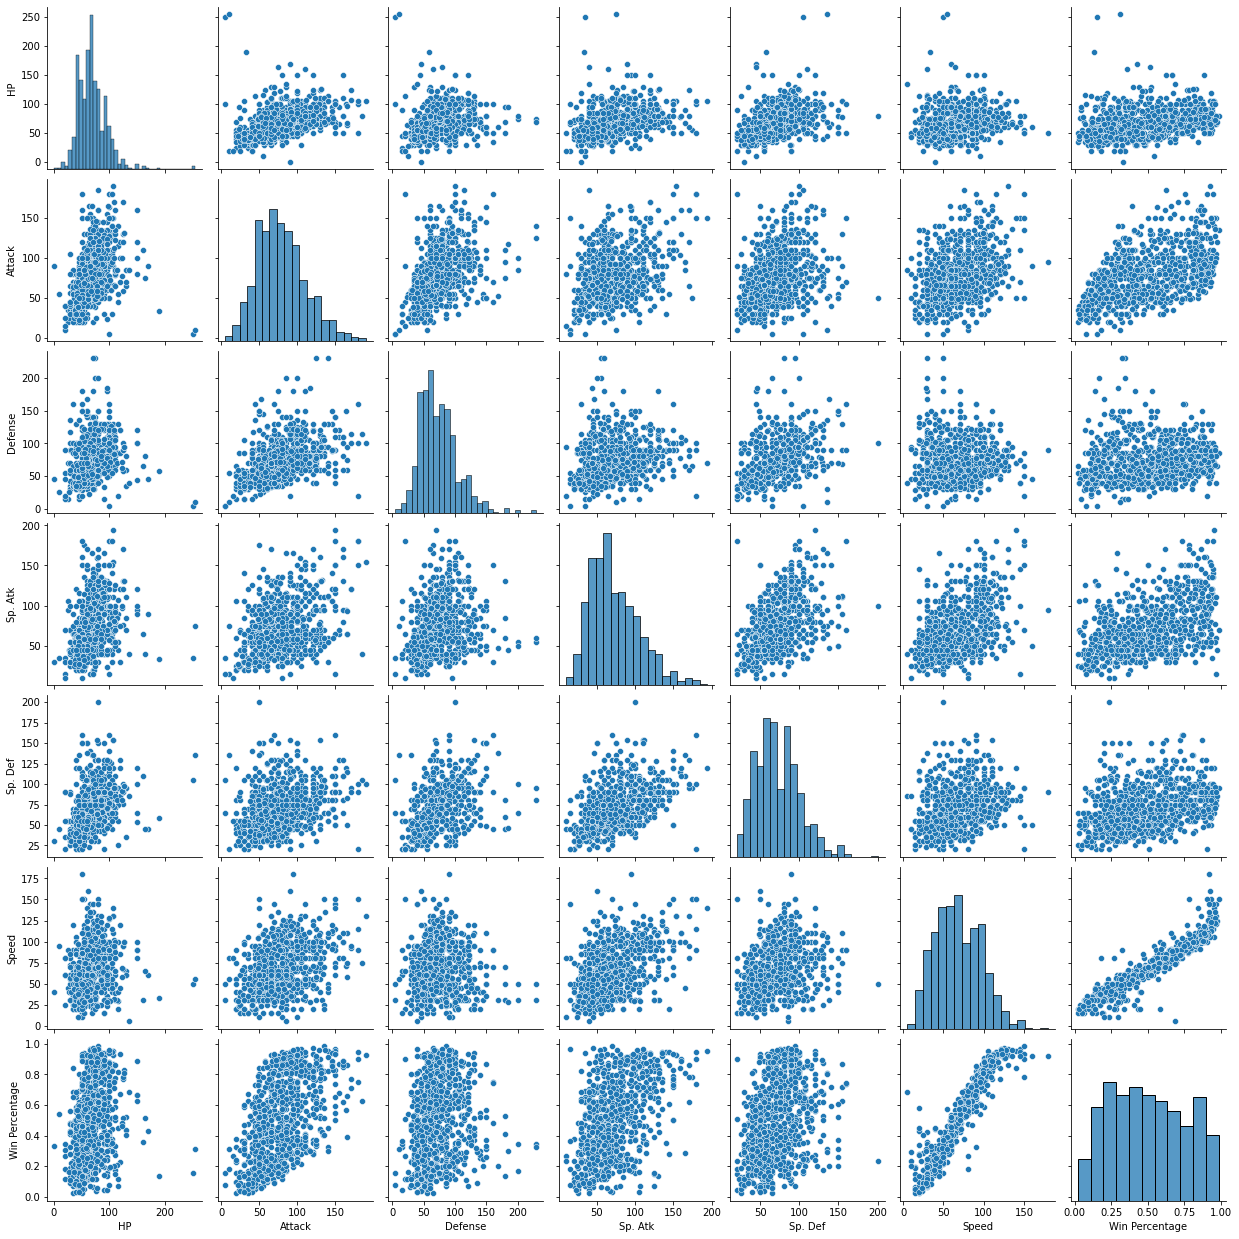

In [ ]:
#sns.distplot(results3["Win Percentage"].dropna(), bins=20)
col = ['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
#results3.loc[:,'HP':'Speed'].corr()
sns.pairplot(results3.loc[:,col].dropna())

### Seaborn PairGrid

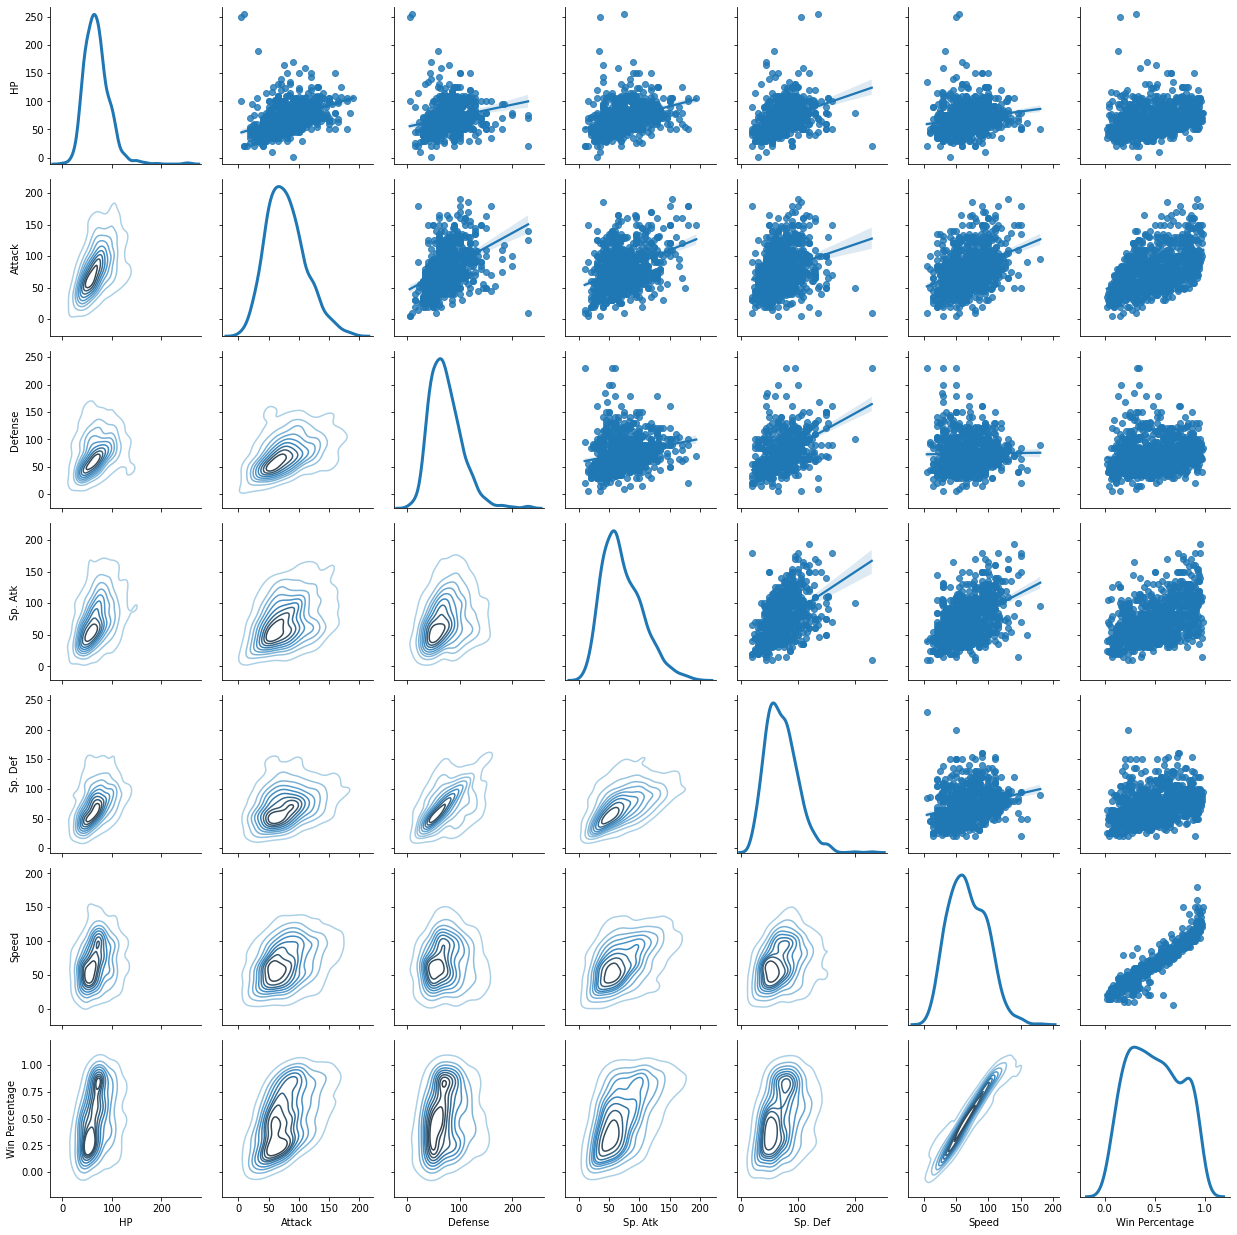

In [ ]:
import matplotlib.pyplot as plt

g = sns.PairGrid(results3.loc[:,col], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

I like the PairGrid better because it provides more customizable options compared to the Pairplot. As you can see I can have two different kinds of graphs on the upper and lower halves of the grid. In the PairGrid above we see 3 types of graphs:

> 1. Regression scatter plot in the upper right
> 2. Density Plot down the diagonal
> 3. Bivariate Denisty plot with contour levels 

In the bottow row, we see 6 empty graphs. The bivariate desity plots cannot plot due to the different scale of values. Win Percentage values range [0,1] while the independent vairables (HP, Attack,...) range from [0,200+].

The diagonal shows the density plots. For most of the independent variables look realtively normal distribution with a right skew. This means a majority of the pokemon stats are on average higher than the median value for the set. However, the density for the win percentage is different. Comparing the density plot with the frequency plot in the pairplot for 'Win Percentage' we see a more uniformly distribution of the rate at which pokemon win with a slight decrease of the frequency at higher levels. 

The upper right section is the most easy to understand and probably the most useful for the analysis. These are regression plots with a line of best fit. Esentially the slope of the line y=mx+b, where m is the slope is the correlation value between the two variables. Thus we would expect to see a simialr pattern if we were to build a heat map or a correlation table. What I am most interested in is the relationship between each independent variable and the dependent variable (Win Percentage). The greater the slope, m, the more correlated the values are in determining the liklihood of winning. Just by 'eye balling' it (not the most mathmematically correct method), but it appears that **speed** and **attack** have the largest relationship to winning. 

## Correlation Table

In [ ]:
results3.loc[:,col].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win Percentage
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.258006
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.500181
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.129426
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.478940
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.324218
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.937742
Win Percentage,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,1.000000


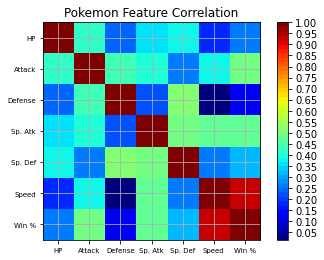

In [ ]:
# https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
#This function was taken from the link above 
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pokemon Feature Correlation')
    labels=['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win %']
    ax1.set_xticklabels(labels,fontsize=7)
    ax1.set_yticklabels(labels,fontsize=7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.00,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(results3.loc[:,col])

The table and the correlation figure provide the exact same information. The figure with colors is more pleasant to look at and when discussing results with** Team Rocket** executives, I would used the "Pokemon Feature Correlation" plot. The diagonal of the plot all the correlations are 1.0, which is perfectly positively correlated. This is becase the diagonal compares each feature to itself. Also, if we were to fold the matrix in half down the diagonal, it would be perfectly semmetical. The top half above the diagonal provides the same information as the lower half. While it might be interesting to look at how the independent features are correlated, I think for our business problem we investigate the features correlated to "win %". Looking at the features with the highest correlation to winning which are speed and atatck. 

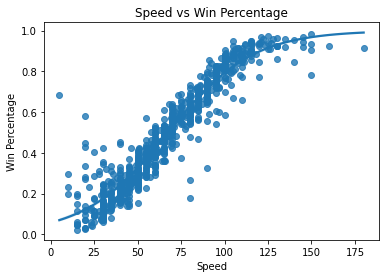

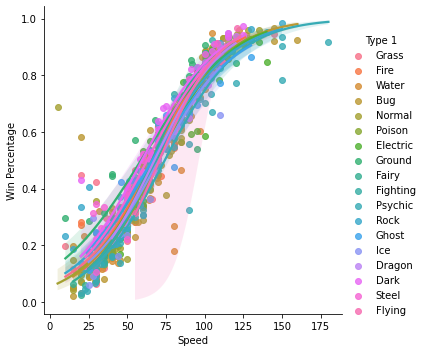

In [ ]:
import matplotlib.pyplot as plt
#f, (ax1, ax2) = plt.subplots(1,2)
sns.regplot(x="Speed", y="Win Percentage", data=results3, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="Win Percentage", data=results3, hue = 'Type 1',  logistic=True)#.set_title("Speed vs Win Percentage")

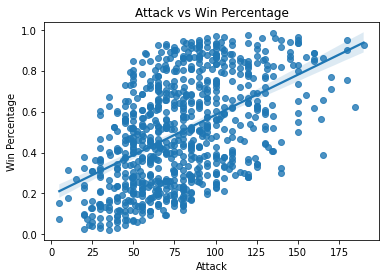

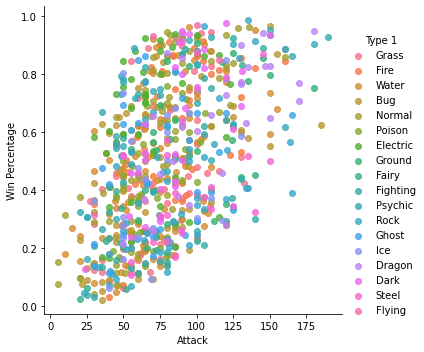

In [ ]:
ax = sns.regplot(x="Attack", y="Win Percentage", data=results3).set_title("Attack vs Win Percentage")
sns.lmplot(x="Attack", y="Win Percentage", data=results3, hue = 'Type 1',fit_reg =False)

The top plot with one solid color was to look at the relationship between the independent and dependent variable as a whole. Breaking down the data further, it was subset by 'type 1' in hopes that a new pattern would appear. I was thinking maybe we would see dragon type pokemon clustered at the higher end of win percentage. But the message I want to send is to think of new ways to continue to break down the data and dive deeper. 

# Exploratory Data Analysis Conclusions

1. **Water, normal, bug and grass are the most common type 1 and flying, ground and poison are the most common type 2. **
    * Team Rocket should have pokemon in their battle squads to counter these types.
2. **The Pokemon type that win the most are flying, dragon, electric and dark. The Pokemon type that win the least are fairy, rock, steel, poison.**
    
3. **Speed and Attack!!**
    * Defense doesn't win championships in the Pokeverse. We need powerful attacks and quickness. If we look back at the top 10 most winning pokemon, all have speeds over 100+ and attacks over 100+ (except for Greninja's attack) 



# Machine Learning

Machine learning is broken up into two categories, **supervised learning and unsupervised learing**. For this dataset, we want to build a model that will predict the liklihood of a pokemon winning a battle. To do this we will be testing several suprvised learning algortithms. There are two sub categories of supervised learning and those are **regression and classification**. In this kernal, we will be using regression models such as **Multiple Linear Regression, Polynomial Regression, SVM,  Decision Tree Regression, Random Forest, XGBoost**. We wil then try to reduce the number of features being used and run the model again. Lastly, we will utilize an unsupervised learning method called **Principle Component Analysis** which transforms the data space and reduces the dimensionality of the problem. The three approaches will be comapred. 

The process for machine learning can be broken into several steps. 
>    1. Select data
>    2. Preprocess data
>    3. Transform Data
>    4. Fit data to model/predict
>    5. Validate model
>    6. Parameter tuning


## Select Data

In [ ]:
dataset = results2

## Preprocessing  Data
​
The data is broken into a testing and training to prevent against over fitting.  I chose to do 80% to 20%, There is no correct ratio to split it. 

In this stage we can also encode any categorical variables we may have. In our case, this would be 'Type 1', 'Type 2', 'Generation' and 'Lengendary'. I do realize the type of Pokemon is very important to the outcome of the battle, for simplicity purposes I plan on leaving that out for now and may revisit this issue in the future. 

In [ ]:
#remove rows with NA values because it will cause errors when fitting to the model
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, 5:11].values
y = dataset.iloc[:, 15].values

# Encoding categorical data (if there is some)
# In this case it could be pokemon type
#'''from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
#X[:, 3] = labelencoder.fit_transform(X[:, 3])
#onehotencoder = OneHotEncoder(categorical_features = [3])
#X = onehotencoder.fit_transform(X).toarray()'''

# Avoiding the Dummy Variable Trap
#X = X[:, 1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Regression Models

I put each regression model into a function so that I don't have to rewrite the code when I change the dimensionality of the data. 



## Multiple Linear Regression

In [ ]:
def ml_linearreg(X_train, X_test, y_train, y_test):
    # Fitting Multiple Linear Regression to the Training set
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))
    # Predicting the Test set results
    y_pred = regressor.predict(X_test)

    # Validating the results
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_linearreg(X_train, X_test, y_train, y_test)

0.907614232004021


0.06143408809230802

## SVM

In [ ]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)
def ml_svm(X_train, X_test, y_train, y_test):
    # Fitting SVR to the dataset
    from sklearn.svm import SVR
    regressor = SVR(kernel = 'linear')
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    #Predict Output
    y_pred= regressor.predict(X_test)
    #y_pred = sc_y.inverse_transform(y_pred)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_svm(X_train, X_test, y_train, y_test)

0.9065078337237095


0.06360099438357145

## Decision Tree Regression

In [ ]:
#feature scaling not needed

def ml_decisiontree(X_train, X_test, y_train, y_test):
    # Fitting Decision Tree Regression to the dataset
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    # Predicting a new result
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_decisiontree(X_train, X_test, y_train, y_test)

0.9997364519875158


0.05780669034067889

## Random Forest

In [ ]:
# no feature scaling needed
def ml_randomforest(X_train, X_test, y_train, y_test):
    # Fitting Random Forest Regression to the dataset
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    # Predicting a new result
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_randomforest(X_train, X_test, y_train, y_test)
    
# Visualising the Random Forest Regression results (higher resolution)
#X_grid = np.arange(min(X), max(X), 0.01)
#X_grid = X_grid.reshape((len(X_grid), 1))
#plt.scatter(X, y, color = 'red')
#plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
#plt.title('Truth or Bluff (Random Forest Regression)')
#plt.xlabel('Position level')
#plt.ylabel('Salary')
#plt.show()

0.9901405589914489


0.05001758969877759

## XGBoost

In [ ]:
def ml_xgboost(X_train, X_test, y_train, y_test):
    import xgboost
    # fitting XGBoost to training set
    xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
    xgb.fit(X_train,y_train)
    print(xgb.score(X_train, y_train))
    # Prediction
    y_pred = xgb.predict(X_test)
    #print(explained_variance_score(y_pred ,y_test))
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_xgboost(X_train, X_test, y_train, y_test)


[01:05:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9973424677349086


0.047636799552118136

In [ ]:
#store all the ML results in an array
all_stats = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]
#all_stats

0.907614232004021
0.9065078337237095
0.9997364519875158
0.9901405589914489
[01:05:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9973424677349086


# Principle Component Analysis 
​
Principle component analysis (PCA) is a dimensionality reduction technique. It uses linear algebra to tranform the data into a new space of principle components. Each principle component explains some variance of the dataset. The goal of this technique is to reduce the amount of features we are using for our model and simplify. The principle components consist of component loadings. The loadings are the correlation coefficients between the variables and factors.

In [ ]:
#PCA

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
#pca = PCA(n_components = None)
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# Provides a vector of the variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("This is the variance explained by the principle components")
print(explained_variance)

#loadings vectors
#print(pca.components_.T * np.sqrt(pca.explained_variance_))

This is the variance explained by the principle components
[0.41314124 0.17695566 0.16108936]


In [ ]:
# run PCA transformed data on ML algos
PCA = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]
#PCA
#ml_linearreg(X_train, X_test, y_train, y_test)
#ml_svm(X_train, X_test, y_train, y_test)
#ml_decisiontree(X_train, X_test, y_train, y_test)
#ml_randomforest(X_train, X_test, y_train, y_test)
#ml_xgboost(X_train, X_test, y_train, y_test)

0.7536920624122638
0.7526006202793667
0.9997364519875158
0.9604959864846145
[01:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9841575890277722


In [ ]:
# reduce the features to only speed and attack. 
dataset = results2
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.loc[:, ['Attack','Speed']].values
y = dataset.loc[:, ['Win Percentage']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#ml_linearreg(X_train, X_test, y_train, y_test)
#ml_svm(X_train, X_test, y_train, y_test)
#ml_decisiontree(X_train, X_test, y_train, y_test)
#ml_randomforest(X_train, X_test, y_train, y_test)
#ml_xgboost(X_train, X_test, y_train, y_test)

reduced_stats = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]

0.9049921104553327


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9040040161126808
0.9930604401118848
0.9859675208484993
[01:06:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9878152829017279


<ipython-input-38-5eba7e685d26>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


## Validation 
​
So far we have fited our data to various regression models and predicted the likilhood of a pokemon winning a battle. The question still remains, how do we know how accurate our predictions are? If you have looked through the code you will see that I used mean absolute error. This gives the average amount our predictions were off. Other metrics are as follows. 
​
1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error
4. R Squared
5. Explained Variance Score

In [ ]:
#compare results from the 3 trials 
ml_results = pd.DataFrame({'All Factors': all_stats, 'Reduced Factors': reduced_stats, 'PCA': PCA})
ml_results.rename(index = {0:'Linear',1:'SVM', 2:'Decision Tree', 3:'Random Forest', 4:'XGBoost'})

,All Factors,Reduced Factors,PCA
Linear,0.061434,0.062812,0.099937
SVM,0.063601,0.064739,0.099990
Decision Tree,0.057807,0.054356,0.129971
Random Forest,0.050018,0.049585,0.096637
XGBoost,0.047637,0.050757,0.093067


The above table provides a comparision of the mean absolute error for each machine learning model and the different dimensionality approaches we took.  **The model with the least error was the XGBoost with reduced factors**. This was the case where we only used attack and speed to predict the win percentage. All models performed significantly worse under PCA. I did not expect these results. It could be because of a combiantion of the parameters I am using for each of the models.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Empy dictionaries to storage the results
sse,db,slc,cal = {}, {}, {}, {}
for k in range(2, 10):
    
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X) # K means Algorithm
    #if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_ # Extraction of labels
    sse[k] = kmeans.inertia_ # Inertia
    db[k] = davies_bouldin_score(X,clusters) # Davies Bouldin Index
    slc[k] = silhouette_score(X,clusters) # Silhouette Index
    cal[k] = calinski_harabasz_score(X,clusters) # Calinski-Harabasz Indez

In [ ]:
slc

{2: 0.40763663535698996,
 3: 0.3747244745854303,
 4: 0.3699016909716507,
 5: 0.34824427416376,
 6: 0.33557322818961366,
 7: 0.3385371910759934,
 8: 0.3367808043189538,
 9: 0.3427218839345576}

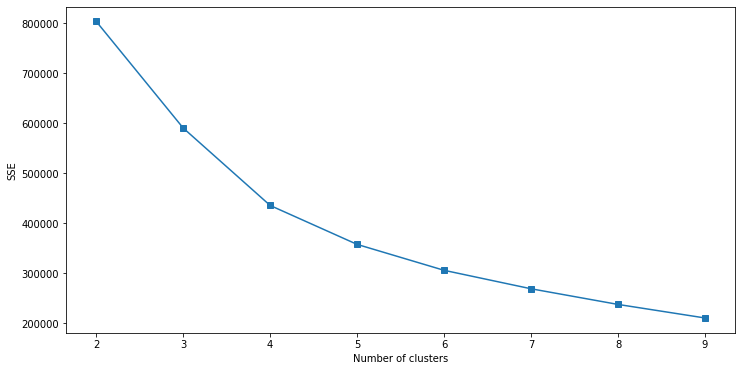

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(list(sse.keys()), list(sse.values()),marker='s')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

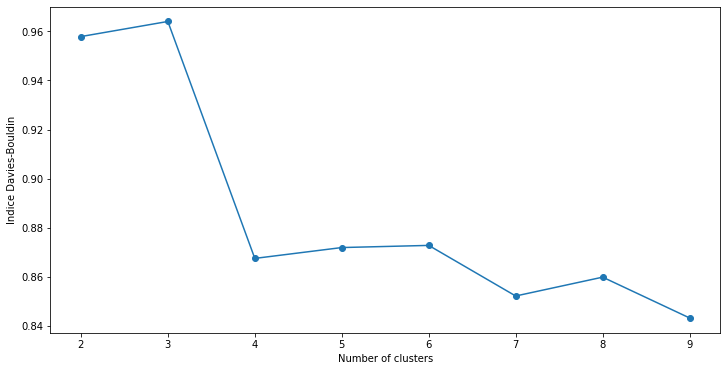

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(list(db.keys()), list(db.values()),marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Indice Davies-Bouldin") # Lower better
plt.show()

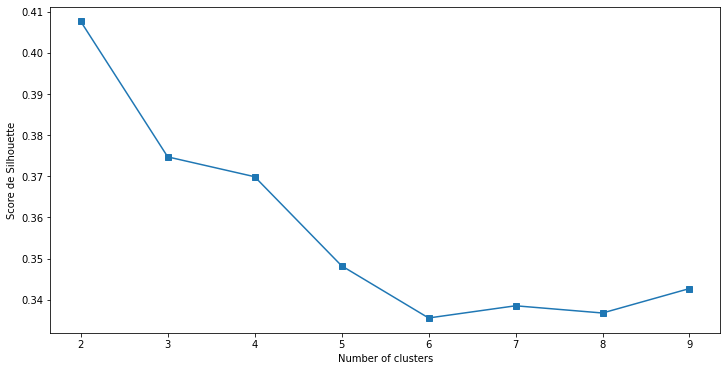

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(list(slc.keys()), list(slc.values()),marker='s')
plt.xlabel("Number of clusters")
plt.ylabel("Score de Silhouette") # mas alto mejor
plt.show()

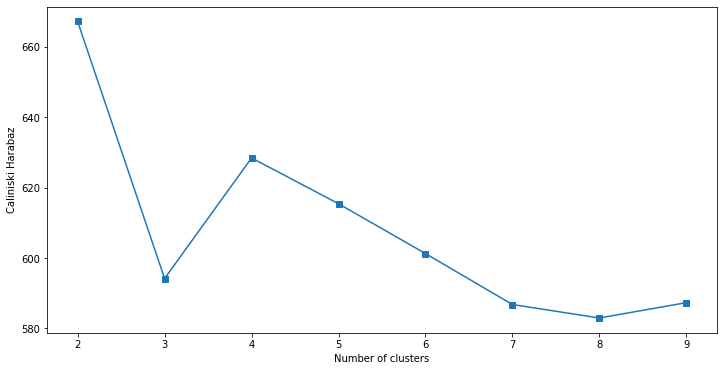

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(list(cal.keys()), list(cal.values()),marker='s')
plt.xlabel("Number of clusters")
plt.ylabel("Caliniski Harabaz") # Mas alto mejor
plt.show()

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


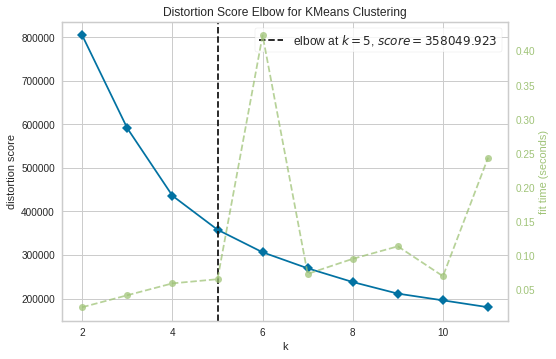

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X)  
visualizer.show()

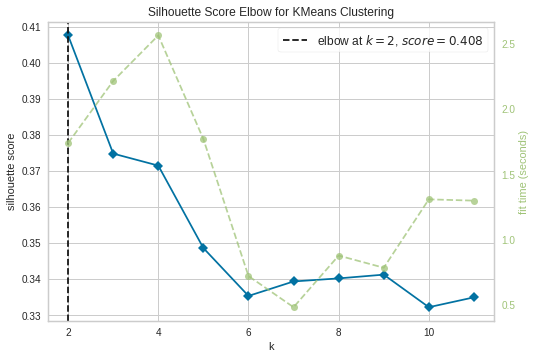

In [ ]:
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette')
visualizer.fit(X)  
visualizer.show()

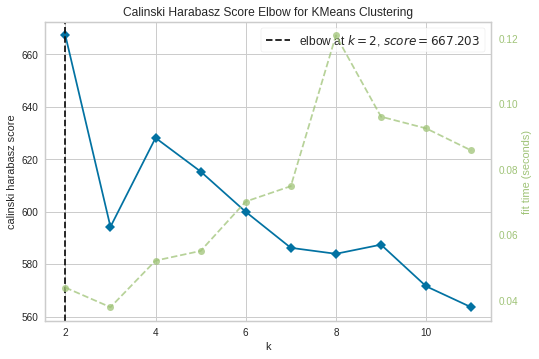

In [ ]:
visualizer = KElbowVisualizer(model, k=(2,12),metric='calinski_harabasz')
visualizer.fit(X)  
visualizer.show()

In [ ]:
clusterer = KMeans(n_clusters=2,max_iter=1000, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1
 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1
 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 0 0 1 0 1 0 1 0 1 

In [ ]:
# The silhouette_score is the average of all of values 
silhouette_avg = silhouette_score(X, cluster_labels)
print(silhouette_avg)
print("For n_clusters =", 2,"The average of score silhouette is: ", silhouette_avg)

0.40763663535698996
For n_clusters = 2 The average of score silhouette is:  0.40763663535698996


In [ ]:
# Calculating the score silhouette for each sample 
sample_silhouette_values = silhouette_samples(X, cluster_labels)
print(sample_silhouette_values)

[ 6.35052040e-01  5.59303294e-01  8.07281740e-02  3.77410770e-01
  5.59148915e-01  2.88632811e-01  3.64865007e-01  5.32674713e-01
  5.21938546e-01  6.33780120e-01  5.67003985e-01  3.82404506e-01
  5.81624381e-01  5.34036246e-01  5.21572688e-01  5.95489791e-01
  5.59037600e-01  1.55937325e-01  4.21805822e-01  6.08410397e-01
  4.62458028e-01  3.18994446e-01  3.62008870e-01  4.75545530e-01
  3.03952565e-01  4.74652115e-01  4.29999592e-01  5.98554309e-01
  1.47281940e-01  2.30183921e-01  4.46836783e-01  1.54322155e-01
  6.31140137e-01  5.84329512e-01  2.12481734e-01  6.24427877e-01
  4.13083270e-01  4.42205557e-01  6.18527804e-01  4.93495632e-01
  5.54670198e-01  2.53557059e-01  5.67414723e-01  6.11951111e-01
  2.11861258e-01  6.08239386e-01  6.01800187e-01  4.46981481e-01
  5.36640599e-01  3.19802482e-01  6.34235695e-01  9.24550136e-02
  1.54892845e-01  3.62443926e-01  3.02066745e-01  2.55543249e-01
  6.16299818e-01  1.74365033e-01  1.88618541e-01  5.14277273e-01
  4.93495632e-01  5.29208

In [ ]:
cluster_labels==0

array([False, False,  True,  True, False, False,  True,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False,  True,  True, False,  True, False,  True,
       False,  True, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False, False,  True,  True, False, False,  True, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False,  True, False, False,  True,  True, False, False,
       False,  True,  True, False,  True, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
        True, False,

In [ ]:
# Adding the scores silhouette for each sample that belongs to the cluster i and ordered 
ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels ==0] # filter of label
ith_cluster_silhouette_values.sort() # Ordered
print(ith_cluster_silhouette_values)
size_cluster_i = ith_cluster_silhouette_values.shape[0] # Size of the clusters
print(size_cluster_i)

[-6.25856820e-02 -5.87103136e-02 -5.28283966e-02 -5.06975839e-02
 -4.71033666e-02 -2.92753358e-02 -2.49871117e-02 -1.53461556e-02
 -1.21703450e-02 -1.21703450e-02 -1.21703450e-02 -1.04448817e-02
 -6.68216227e-03 -6.68216227e-03  2.09123504e-04  2.10969602e-03
  4.57979504e-03  4.78691046e-03  4.78691046e-03  1.91816183e-02
  1.91816183e-02  2.39280314e-02  2.49077422e-02  2.82508777e-02
  3.07677016e-02  3.24691781e-02  3.24691781e-02  3.24691781e-02
  3.50796853e-02  4.23944344e-02  5.07964490e-02  5.15710111e-02
  5.47050967e-02  5.68210814e-02  5.79158273e-02  5.96154751e-02
  6.02581060e-02  7.09702821e-02  7.09702821e-02  7.73206605e-02
  8.07281740e-02  8.07281740e-02  8.68591349e-02  9.40790942e-02
  9.94337363e-02  1.24375560e-01  1.24375560e-01  1.33043581e-01
  1.34007730e-01  1.34081322e-01  1.39529884e-01  1.40178050e-01
  1.42402407e-01  1.43730085e-01  1.47281940e-01  1.47868768e-01
  1.54232578e-01  1.54322155e-01  1.54322155e-01  1.55937325e-01
  1.55944372e-01  1.55944

For n_clusters = 2 The average of the score silhouette is:  0.40763663535698996


IndexError: ignored

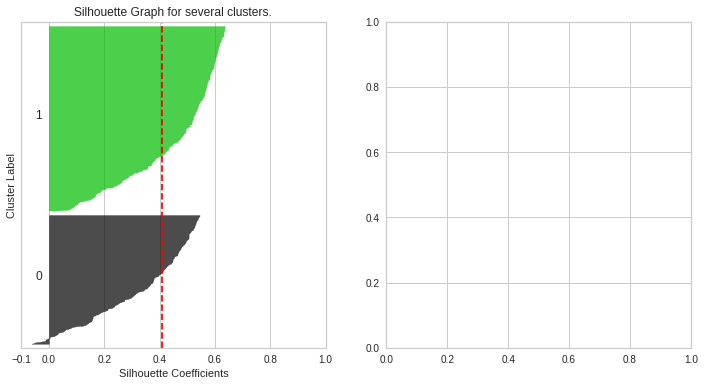

In [ ]:
for n_clusters in range(2, 10):
    # Subplot 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)
    # Subplot 1: score silhouette 
    # The range of silhouette index is [-1, 1]
    ax1.set_xlim([-0.1, 1]) 
    # To add an space between the silhouette and the scatter plot we use: (n_clusters+1)*10 
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Fitting the data
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The score de silhouette_score provide the average of all the values 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average of the score silhouette is: ", silhouette_avg)
    # Calculating the score silhouette for each sample 
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Adding the scores silhouette for the samples that belong to the cluster i and ordered 
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Order
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Cluster Size
        y_upper = y_lower + size_cluster_i 
        color = cm.nipy_spectral(float(i) / n_clusters) # Colors
        ax1.fill_betweenx(np.arange(y_lower, y_upper), # limits in y
                          0, ith_cluster_silhouette_values, #limits in x
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the graphs of silhouette 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calculate the new y_lower for the next graph
        y_lower = y_upper + 10 
    ax1.set_title("Silhouette Graph for several clusters.")
    ax1.set_xlabel("Silhouette Coefficients")
    ax1.set_ylabel("Cluster Label")
    # The vertical line for the average of score silhouette
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Drop off labels in y 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # Ticks for comparison

    # Graph 2: clusters 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # Colors
    ax2.scatter(X[:,2], X[:, 3], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # clusters labels
    centers = clusterer.cluster_centers_
    # Coloring in white the centroids of the clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerate the centroids
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualization after to get the clusters")
    ax2.set_xlabel("Reactions")
    ax2.set_ylabel("Comments")

    plt.suptitle(("Analysis of Silhouette for KMeans clustering algorithm "
                  "With n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Cross Validation

In [ ]:
# Libraries
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#  Data
from sklearn.model_selection import train_test_split
dataframe = pd.read_csv("pokemon.csv", header=None)
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False


In [ ]:
# Separating X y y
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(50001, 2) (50001,)


In [ ]:
# Creating loocv process
cv = LeaveOneOut()

In [ ]:
# The model
model = RandomForestClassifier(random_state=42,n_estimators=30, criterion="gini",max_depth=4)

In [ ]:
# Evaluating the model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 50001 out of 50001 | elapsed:  2.4min finished


In [ ]:
# The performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: nan (nan)
